# Notebook for reproducing SI figure of self-shadowing effect

This example shows the simulation of self-shadowing effect in SiNx stencils.
The majority of membranes used in MBHL have thickness around 100 nm.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from mbhl import *

In [23]:
%mkdir -p subfigs-SI-shadow

In [29]:
def plot_pattern_honeycomb(
    ax,
    delta=50 * nm,
    phi=5,
    theta=30,
    gap=2.5 * um,
    n_pts=1,
    r=50 * nm,
    Lr_ratio=4,
    lim=(0, 1 * um, 0, 1 * um),
    method="fft",
):
    phi = np.deg2rad(phi)
    theta = np.deg2rad(theta)
    L = r * Lr_ratio
    R = np.tan(phi) * gap
    print(f"Shift is {R / um} um")
    geom = honeycomb_hole_lattice(r, L, orientation="vertical")
    stencil = Stencil(geom, thickness=delta, gap=gap, h=L / 128)
    phys = Physics(n_beam_trajectory(phi, theta_0=theta, n_pts=n_pts))
    system = System(stencil, phys)
    system.simulate(method=method, fold_to_bz=False)
    if ax is not None:
        ax.set_axis_off()
        ax, cm = system.draw(
            ax=ax,
            cmap="viridis",
            domain=lim,
            show_mask=True,
        )
    return ax, cm

Shift is 0.21872165881480998 um
Shift is 0.44081745177116244 um
Shift is 0.6698729810778068 um
Shift is 1.443375672974064 um
Shift is 2.4999999999999996 um
Shift is 4.330127018922192 um


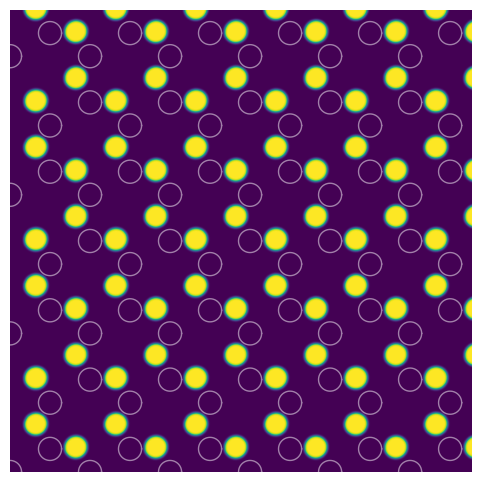

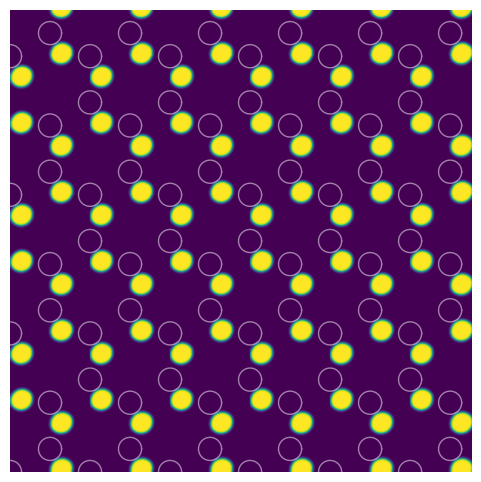

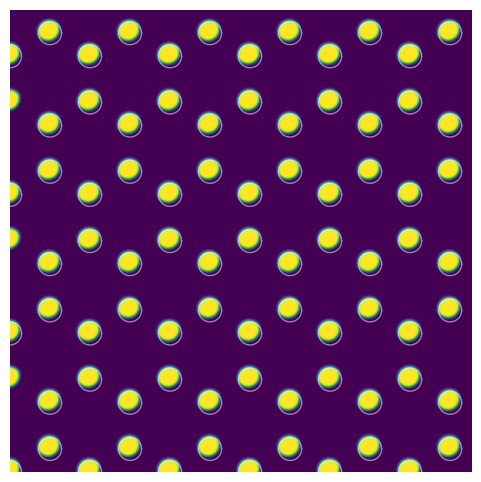

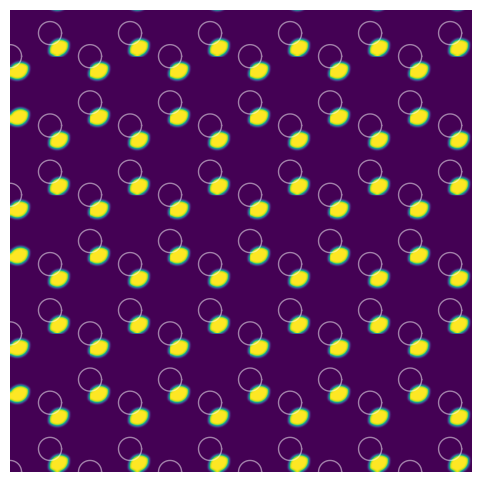

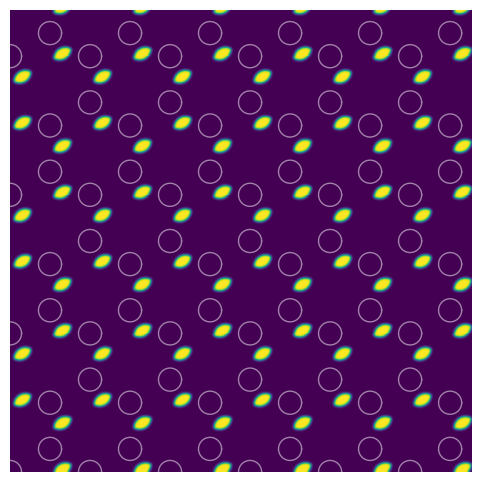

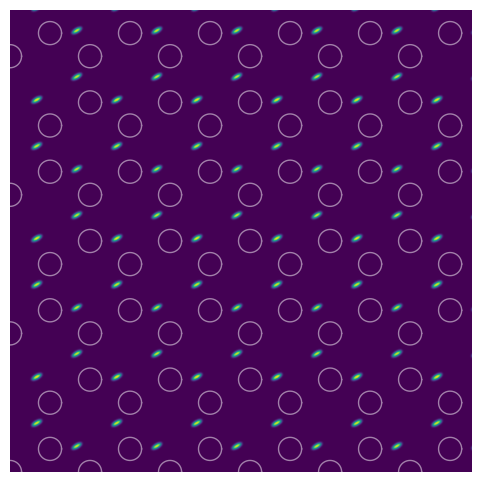

In [32]:
for phi in (5, 10, 15, 30, 45, 60):
    fig, ax = plt.subplots(figsize=(6, 6))
    domain = (0 * um, 2 * um, 0 * um, 2 * um)
    plot_pattern_honeycomb(
        ax, phi=phi, r=50 * nm, method="raytracing", lim=domain
    )
    fig.savefig(
        Path("subfigs-SI-shadow") / f"1pt-honeycomb-raytracing-phi-{phi}.png"
    )